<a href="https://colab.research.google.com/github/saspav/linear-models/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

In [2]:
!python --version

Python 3.10.12


In [3]:
import sklearn

sklearn.__version__

'1.2.2'

### Вопрос 1.
Создайте данные используя make_regression(n_samples=100, n_features=20, noise=10, random_state=42) Что можно сказать о полученных данных?
- Среднее признаков по модулю меньше единицы и стандартное отклонение около единицы (отличается не более, чем на 20%) - ДА
- Есть корреляции больше .5 между разными признаками
- Для вычисления значений признаков требуется регуляризованная регрессия
- Для лучшего предсказания признаки нужно отнормировать

In [4]:
# Создаем данные
X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)

# Преобразуем данные в DataFrame для удобства анализа
data = pd.DataFrame(X, columns=[f'x{i}' for i in range(20)])
# data['Target'] = y

In [5]:
# Основные статистические показатели
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.066483,-0.090669,0.148793,-0.009252,0.066883,0.138678,-0.020263,0.135566,0.048246,0.021527,-0.067366,0.116212,0.181512,-0.021257,0.140830,0.164645,-0.083936,0.011392,-0.013781,-0.032560
std,1.029991,0.977525,0.933608,0.895542,0.927696,0.923655,0.978568,0.946059,0.904497,1.078934,0.849485,1.024664,1.045479,1.053048,0.921654,1.088579,1.063061,1.186164,1.007022,0.885011
min,-2.896255,-1.975467,-2.499406,-2.172670,-2.423879,-1.703382,-1.748532,-1.760809,-2.471645,-3.241267,-2.703232,-2.198806,-2.619745,-2.591042,-2.872262,-2.152891,-2.696887,-2.940389,-2.151815,-2.650970
25%,-0.534866,-0.857052,-0.356271,-0.640109,-0.496090,-0.552580,-0.766607,-0.655722,-0.585946,-0.650129,-0.555773,-0.659615,-0.531525,-0.676945,-0.435979,-0.608664,-0.945732,-0.684015,-0.775432,-0.554979
50%,-0.028445,-0.076344,0.178798,-0.016458,0.131194,0.145691,-0.020941,0.147305,-0.012252,0.044188,-0.010110,0.214404,0.046091,-0.094711,0.174999,0.024079,-0.004435,0.091795,-0.022596,0.040263
75%,0.757704,0.531959,0.721849,0.564199,0.493497,0.839220,0.622830,0.759989,0.654505,0.691722,0.466162,0.819755,0.997346,0.648388,0.751524,0.860472,0.623706,0.821707,0.584392,0.591680
max,2.290943,2.439752,2.526932,2.122156,3.137749,3.078881,2.270693,2.455300,2.133033,2.560085,1.848956,2.601683,2.644343,3.193108,2.720169,3.852731,2.170943,2.558199,2.403416,1.765454


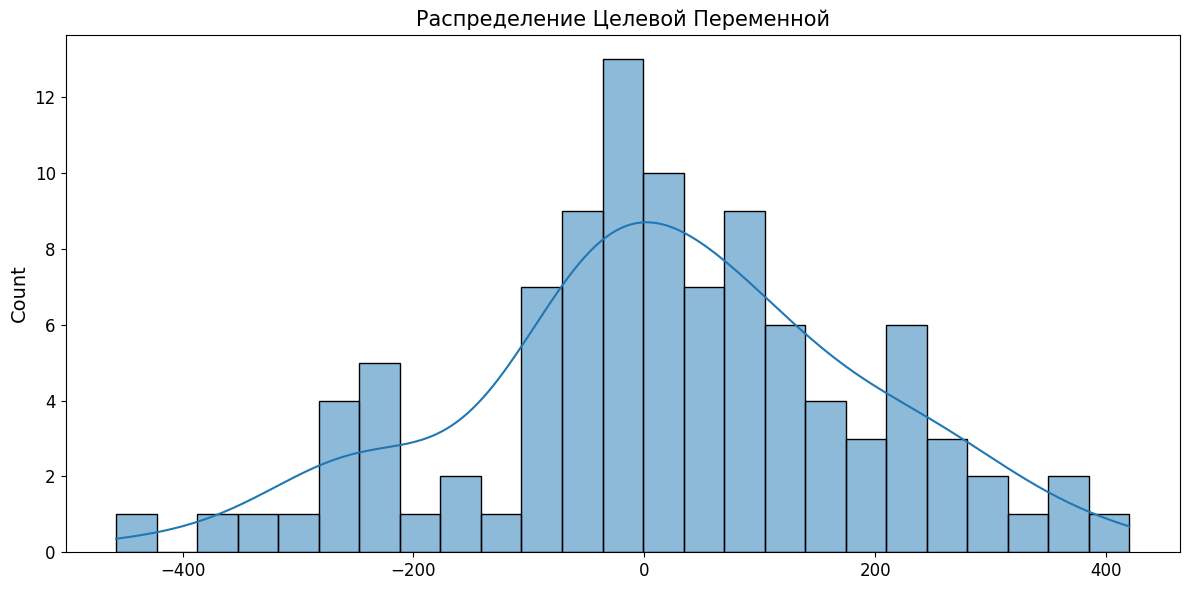

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=25, kde=True)
plt.title('Распределение Целевой Переменной')
plt.tight_layout()
plt.show()

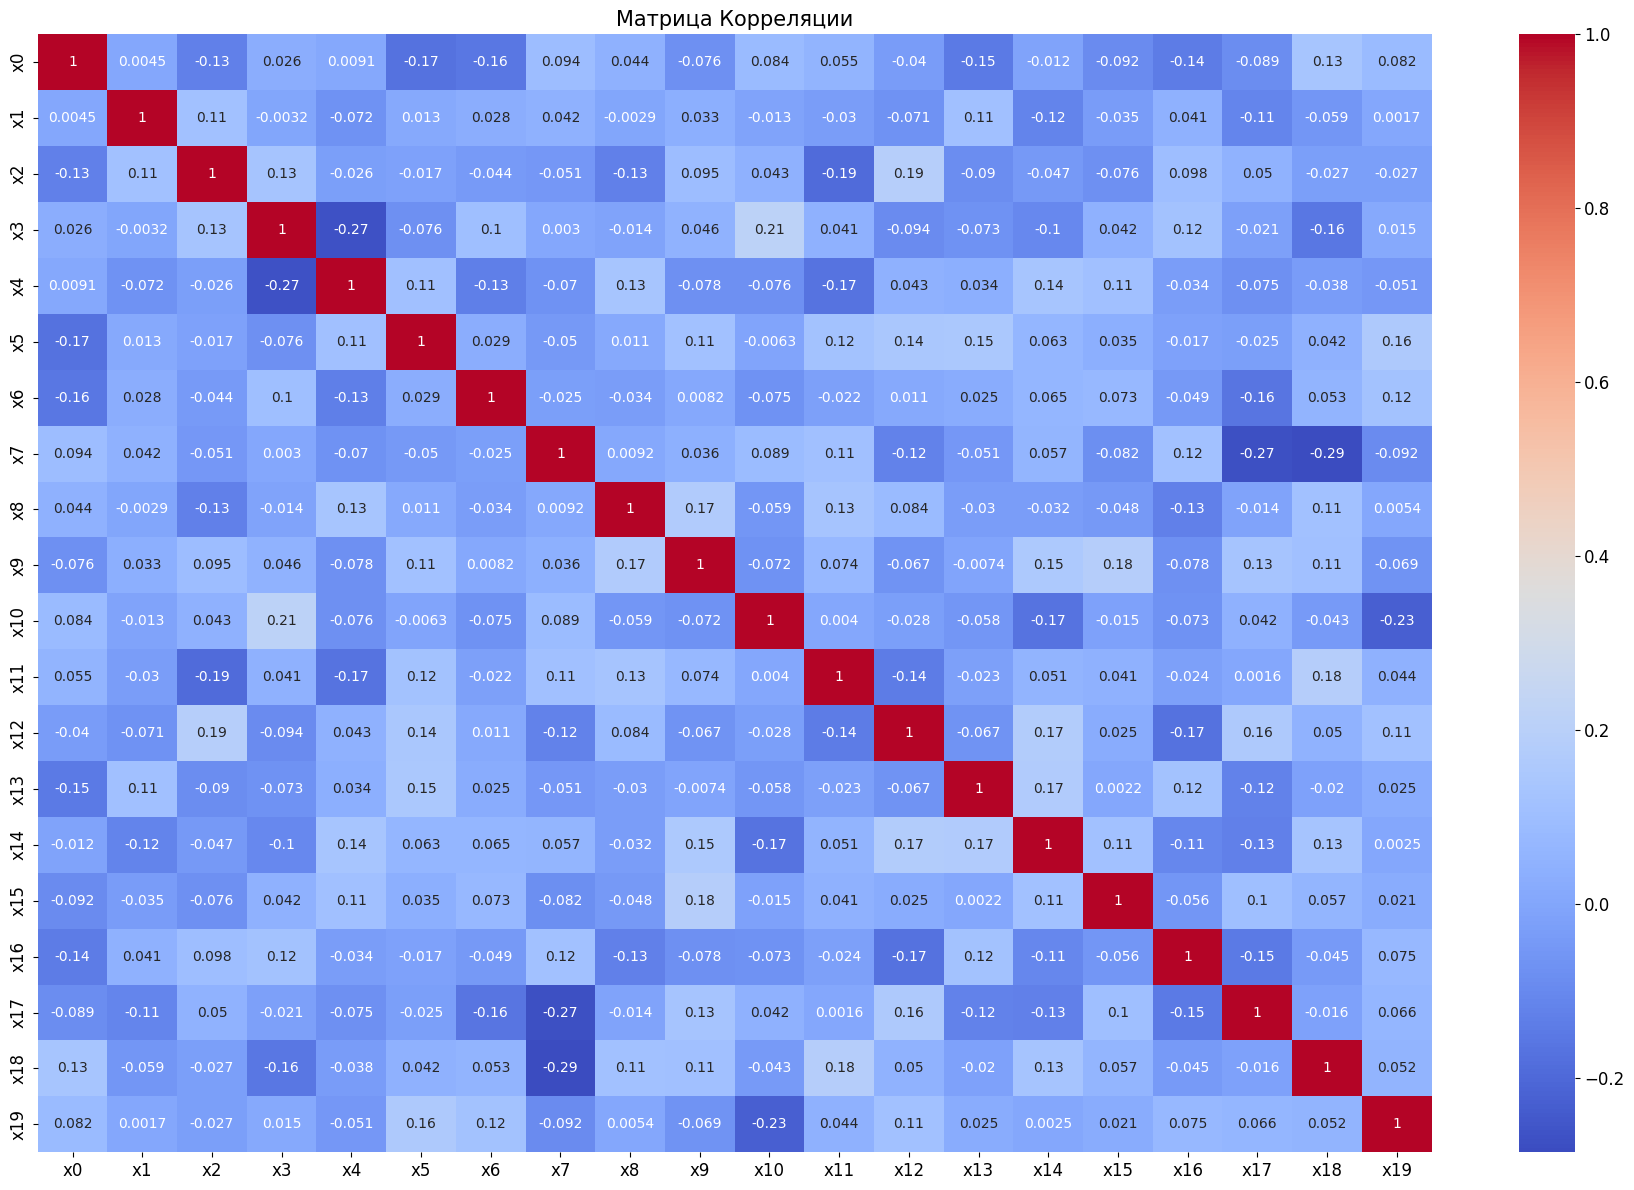

In [7]:
# Матрица корреляции
correlation_matrix = data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица Корреляции')
plt.tight_layout()
plt.show()

In [8]:
no_yes = ('НЕТ', 'ДА')

x_stats = data.describe()
std = x_stats.loc['std', :]
mean_abs = x_stats.loc['mean', :].abs().max()
print('Среднее признаков по модулю:', mean_abs)
print('Стандартное отклонение: \n\tсреднее: ', std.mean(),
      '\n\tминимум: ', std.min(), '\n\tмаксимум:', std.max())

# Получаем массив данных датафрейма
matrix = correlation_matrix.values
# Обнуляем элементы на главной диагонали
np.fill_diagonal(matrix, 0)
print('\nМаксимальное значение коэффициента корреляции:', np.abs(matrix).max())

Среднее признаков по модулю: 0.18151188941537225
Стандартное отклонение: 
	среднее:  0.986012088607926 
	минимум:  0.8494850599331794 
	максимум: 1.1861644223044339

Максимальное значение коэффициента корреляции: 0.28580295408502704


In [9]:
# Среднее признаков по модулю меньше единицы и стандартное отклонение около единицы
# (отличается не более, чем на 20%)
print(f'1. Среднее признаков по модулю меньше единицы:', no_yes[mean_abs < 1])
print(f'1. Стандартное отклонение ~1+-20%:', no_yes[std.min() > 0.8 and std.max() < 1.2])

# Есть корреляции больше .5 между разными признаками ?
# Находим корреляции больше 0.5
high_correlation = correlation_matrix.abs() > 0.5
# Исключаем диагональные элементы
high_correlation = high_correlation.mask(np.eye(high_correlation.shape[0], dtype=bool))
# Проверяем, есть ли хотя бы одна корреляция больше 0.5
has_high_corr = high_correlation.any().any()
print('2. Есть корреляции больше 0.5 между разными признаками:', no_yes[has_high_corr])

1. Среднее признаков по модулю меньше единицы: ДА
1. Стандартное отклонение ~1+-20%: ДА
2. Есть корреляции больше 0.5 между разными признаками: НЕТ


In [10]:
# Получаем массив данных датафрейма
matrix = correlation_matrix.values
# Обнуляем элементы на главной диагонали
np.fill_diagonal(matrix, 0)
print('Максимальное значение корреляции:', np.abs(matrix).max())

Максимальное значение корреляции: 0.28580295408502704


3. Для вычисления значений признаков требуется регуляризованная регрессия: Поскольку в данных нет высокой корреляции между признаками, это указывает на отсутствие явной проблемы мультиколлинеарности. В таком случае, регуляризованная регрессия может не требоваться и модель без регуляризации может использоваться для вычисления значений признаков.

Ответ - НЕТ

4. Для лучшего предсказания признаки нужно отнормировать: Т.к. признаки не обладают большим разбросом значений. Cреднее значение признаков около нуля. Стандартное отклонение около 1 и не более 20% для всех признаков. Нормировка признаков может не требоваться, но с другой стороны нормировка признаков может улучшить интерпретируемость и стабильность модели, а также помочь справедливо сравнить важность признаков.

Ответ - НЕТ

### Вопрос 2.
Используя sklearn.linear_model постройте LinearRegression, Ridge(random_state=1), Lasso на дефолтных параметрах и ненормированных признаках. Для оценки регрессии используем R2 из функции score модели.

Ответьте на вопросы 1-3.
- По score (R2) Ridge лучше всего
- По score (R2) LinearRegression лучше всего - ДА
- По score (R2) Lasso лучше всего

In [11]:
import pandas as pd
import sklearn

print('sklearn version:', sklearn.__version__)

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Создаем данные
X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)

# Создаем модели
linear_reg = LinearRegression()
ridge_reg = Ridge(random_state=1)
lasso_reg = Lasso()

# Обучаем модели на всех данных
linear_reg.fit(X, y)
ridge_reg.fit(X, y)
lasso_reg.fit(X, y)

# Предсказываем значения на всех данных
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)

# Оцениваем качество моделей с помощью метода score (R2)
r2_linear = linear_reg.score(X, y)
r2_ridge = ridge_reg.score(X, y)
r2_lasso = lasso_reg.score(X, y)

result = {'Linear Regression': [r2_linear],
          'Ridge Regression': [r2_ridge],
          'Lasso Regression': [r2_lasso]}

result = pd.DataFrame(result).T.rename(columns={0: 'R2_score'})
result.index.name = 'Model'

result.sort_values('R2_score', ascending=False)

sklearn version: 1.2.2


,R2_score
Model,
Linear Regression,0.997264
Ridge Regression,0.997130
Lasso Regression,0.996645


#### Теперь отнормируйте признаки. Постройте опять 3 регрессии.
- По score (R2) Ridge лучше всего - (ДА в ответе на сайте)
- По score (R2) LinearRegression лучше всего - ДА
- По score (R2) Lasso лучше всего
- Из всех построенных регрессий в вопросе, Ridge на нормированных признаках лучше всего

In [12]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Создаем данные
X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)

# Нормируем признаки с помощью StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модели
linear_reg = LinearRegression()
ridge_reg = Ridge(random_state=1)
lasso_reg = Lasso()

# Обучаем модели на нормированных данных
linear_reg.fit(X_scaled, y)
ridge_reg.fit(X_scaled, y)
lasso_reg.fit(X_scaled, y)

# Оцениваем качество моделей с помощью метода score (R2)
r2_linear = linear_reg.score(X_scaled, y)
r2_ridge = ridge_reg.score(X_scaled, y)
r2_lasso = lasso_reg.score(X_scaled, y)

result = {'Linear Regression': [r2_linear],
          'Ridge Regression': [r2_ridge],
          'Lasso Regression': [r2_lasso]}

result = pd.DataFrame(result).T.rename(columns={0: 'R2_score'})
result.index.name = 'Model'

print('Результат с нормированными признаками:')

result.sort_values('R2_score', ascending=False)

Результат с нормированными признаками:


,R2_score
Model,
Linear Regression,0.997264
Ridge Regression,0.997161
Lasso Regression,0.996662


### Вопрос 3.
Из вопроса 2 используйте LinearRegression, Ridge, Lasso, построенные на признаках без нормирования. Для ответов на вопросы сравните полученные коэффициенты.

Для LinearRegression посчитайте значимость признаков, используя statsmodels. Достаньте истинные значения признаков из make_regression.

Для вопросов 5 и 6 формула расчета:

d = abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)

if d == np.inf: d=1

if d == np.nan: d=0

coefs - истинные коэффициенты.
- Значение коэффициента у константы лучше всего оценила LinearRegression (без проверки значимости)
- Lasso правильно занулила все нулевые признаки
- Модуль statsmodels для LinearRegression неправильно определил значимость некоторых коэффициентов
- У Ridge и Lasso коэффициенты всегда меньше, чем у LinearRegression
- LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей абсолютных отклонений от истинного значения
- LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей абсолютных отклонений от истинного значения и занулить те коэффициенты, которые незначимо отличаются от нуля по p-value - (Верный ответ ДА)

In [13]:
# Функция для расчета d
def calculate_d(reg, coefs):
    coefs_copy = coefs.copy()
    coefs_copy[coefs_copy == 0] = 1.e-13
    d = np.abs(reg.coef_ - coefs_copy) / coefs_copy
    d[np.isinf(d)] = 1
    d[np.isnan(d)] = 0
    return np.round(d, 5)

In [14]:
import numpy as np
import pandas as pd

try:
    import statsmodels.api as sm
    from sklearn.datasets import make_regression
    from sklearn.linear_model import LinearRegression, Ridge, Lasso


    # Создаем данные
    X, y, true_coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42,
                                       coef=True)

    # Создаем модели
    linear_reg = LinearRegression()
    ridge_reg = Ridge(random_state=1)
    lasso_reg = Lasso()

    # Обучаем модели на ненормированных данных
    linear_reg.fit(X, y)
    ridge_reg.fit(X, y)
    lasso_reg.fit(X, y)

    # Добавляем константу (intercept) к данным для модели LinearRegression
    X_with_intercept = sm.add_constant(X)

    # Обучаем модель LinearRegression с использованием statsmodels
    model = sm.OLS(y, X_with_intercept).fit()

    # # Выводим результаты
    # print("Linear Regression Coefficients:")
    # print(linear_reg.intercept_, linear_reg.coef_)
    # print("\nRidge Regression Coefficients:")
    # print(ridge_reg.intercept_, ridge_reg.coef_)
    # print("\nLasso Regression Coefficients:")
    # print(lasso_reg.intercept_, lasso_reg.coef_)

    # # Выводим значимость признаков для Linear Regression
    # print("\nЗначимость признаков (p-values) для Linear Regression:", len(model.pvalues))
    # print(model.pvalues)

    # # Выводим истинные значения признаков
    # print("\nИстинные значения признаков:", len(true_coefs))
    # print(true_coefs)

    # Рассчитываем d для каждой модели
    d_linear = calculate_d(linear_reg, true_coefs)
    d_ridge = calculate_d(ridge_reg, true_coefs)
    d_lasso = calculate_d(lasso_reg, true_coefs)

    # Выводим результаты
    # print("\nd для Linear Regression:")
    # print(d_linear)
    # print("\nd для Ridge Regression:")
    # print(d_ridge)
    # print("\nd для Lasso Regression:")
    # print(d_lasso)
    # print()

    # Получаем коэффициенты моделей
    coefficients = {'True_coef': true_coefs,
                    'Linear': linear_reg.coef_,
                    'Ridge': ridge_reg.coef_,
                    'Lasso': lasso_reg.coef_
                    }

    # Создаем датафрейм из коэффициентов
    coefficients_df = pd.DataFrame(coefficients, index=[f'W{i}' for i in range(20)])

    # # Выводим датафрейм с коэффициентами
    # print(coefficients_df)

    intercepts = {'True_coef': 0,
                  'Linear': linear_reg.intercept_,
                  'Ridge': ridge_reg.intercept_,
                  'Lasso': lasso_reg.intercept_
                  }
    intercepts = pd.DataFrame(intercepts, index=['intercept'])
    # print(intercepts)

    coefficients_df = pd.concat([intercepts, coefficients_df])
    coefficients_df.index.name = 'coeff'

    coefficients_df['p-value'] = model.pvalues.round(5)
    coefficients_df['D_linear'] = np.insert(d_linear, 0, abs(linear_reg.intercept_).round(5))
    coefficients_df['D_ridge'] = np.insert(d_ridge, 0, abs(ridge_reg.intercept_).round(5))
    coefficients_df['D_lasso'] = np.insert(d_lasso, 0, abs(lasso_reg.intercept_).round(5))

    coefficients_df.to_csv('coefficients_df.csv')

except:
    print('ОШИБКА!!! Не смог загрузить statsmodels.api')
    coefficients_df = pd.read_csv('coefficients_df.csv', index_col=0)

Значимость признаков, измеряемая p-значениями (p-values), в контексте линейной регрессии помогает определить, насколько каждый признак вносит значимый вклад в объяснение зависимой переменной (целевой переменной). Ниже приведена интерпретация значимости признаков на основе p-значений в линейной регрессии:

Маленькое p-значение (< 0.05): Если p-значение признака меньше выбранного уровня значимости (например, 0.05), это может указывать на то, что данный признак статистически значимо влияет на зависимую переменную. В таком случае, можно сказать, что признак является значимым для модели и его коэффициент можно считать надежным.

Большое p-значение (> 0.05): Если p-значение признака больше уровня значимости, это может указывать на то, что данный признак не оказывает статистически значимого влияния на зависимую переменную. В таком случае, коэффициент признака может быть неинформативным и можно рассмотреть возможность удаления этого признака из модели.

In [15]:
coefficients_df

,True_coef,Linear,Ridge,Lasso,p-value,D_linear,D_ridge,D_lasso
coeff,,,,,,,,
intercept,0.000000,-0.254340,-0.045781,0.122267,0.81732,2.543400e-01,4.578000e-02,0.12227
W0,6.600984,5.819345,5.882773,4.455531,0.00000,1.184100e-01,1.088000e-01,0.32502
W1,94.768803,93.616940,92.683787,92.733835,0.00000,1.215000e-02,2.200000e-02,0.02147
W2,40.710649,40.451125,39.841555,39.043949,0.00000,6.370000e-03,2.135000e-02,0.04094
W3,0.000000,-0.136954,-0.073618,0.000000,0.91482,1.369544e+12,7.361786e+11,1.00000
W4,0.000000,0.932946,0.872596,0.000000,0.45207,9.329457e+12,8.725964e+12,1.00000
W5,0.000000,-1.552817,-1.464074,-0.000000,0.19570,1.552817e+13,1.464074e+13,1.00000
W6,11.099810,12.999251,12.856884,11.265016,0.00000,1.711200e-01,1.583000e-01,0.01488
W7,95.511521,95.576680,94.206690,94.295032,0.00000,6.800000e-04,1.366000e-02,0.01274


In [16]:
# Значение коэффициента у константы лучше всего оценила модель: ХХХ (без проверки значимости)
coef = 'True_coef'
regs = ['Linear', 'Ridge', 'Lasso']
d_regs = ['D_linear', 'D_ridge', 'D_lasso']

delta = np.abs(coefficients_df.loc['intercept', :][regs] -
               coefficients_df.loc['intercept', coef])
delta.sort_values()

Ridge     0.045781
Lasso     0.122267
Linear    0.254340
Name: intercept, dtype: float64

In [17]:
mdl = delta.idxmin()
print('1. Значение коэффициента у константы лучше всего оценила модель:', mdl, delta[mdl])

# 2. Lasso правильно занулила все нулевые признаки ?
# Выберем строки с нулевыми коэффициентами в исходных данных
df = coefficients_df[coefficients_df.True_coef == 0].drop('intercept', axis=0)
print('2. Lasso правильно занулила все нулевые признаки:',
      ('НЕТ', 'ДА')[np.all(np.abs(df.True_coef - df.Lasso) < .01)])

# 3. Модуль statsmodels для LinearRegression неправильно определил значимость
# некоторых коэффициентов ?
# Истинные коэффициенты отличные от нуля и p-value > 0.05, т.е. коэффициент не значимый
essential = (np.abs(coefficients_df.True_coef) > 0) & (coefficients_df['p-value'] > .05)
# Истинные коэффициенты близки к нулю и p-value < 0.05, т.е. коэффициент значимый
not_essent = (np.abs(coefficients_df.True_coef) < .01) & (coefficients_df['p-value'] < .05)
df = coefficients_df[essential | not_essent]
print('3. Модуль statsmodels определил значимость коэффициентов:',
      'НЕ' * (len(df) > 0) + 'ПРАВИЛЬНО')

# 4. У Ridge и Lasso коэффициенты всегда меньше, чем у LinearRegression
ridge = np.all(coefficients_df.Ridge < coefficients_df.Linear)
print('4. У Ridge коэффициенты всегда меньше, чем у LinearRegression:',
      ('НЕТ', 'ДА')[np.all(coefficients_df.Ridge < coefficients_df.Linear)])
print('4. У Lasso коэффициенты всегда меньше, чем у LinearRegression:',
      ('НЕТ', 'ДА')[np.all(coefficients_df.Lasso < coefficients_df.Linear)])

d_reg = {'D_linear': 'Linear Regression',
         'D_ridge': 'Ridge Regression',
         'D_lasso': 'Lasso Regression'}

# 5. LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей
# абсолютных отклонений от истинного значения
print(f'5. {d_reg[coefficients_df[d_regs].sum().idxmin()]} точнее определила коэффициенты')

# 6. LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей
# абсолютных отклонений от истинного значения и занулить те коэффициенты, которые незначимо
# отличаются от нуля по p-value
temp = coefficients_df[coefficients_df['p-value'] < 0.05][d_regs].sum()
print(f'6. {d_reg[temp.idxmin()]} точнее определила значимые коэффициенты по p-value')

1. Значение коэффициента у константы лучше всего оценила модель: Ridge 0.0457812381567706
2. Lasso правильно занулила все нулевые признаки: ДА
3. Модуль statsmodels определил значимость коэффициентов: ПРАВИЛЬНО
4. У Ridge коэффициенты всегда меньше, чем у LinearRegression: НЕТ
4. У Lasso коэффициенты всегда меньше, чем у LinearRegression: НЕТ
5. Lasso Regression точнее определила коэффициенты
6. Linear Regression точнее определила значимые коэффициенты по p-value


### Вопрос 4.
Давайте теперь разберем, как правильно нормировать Х. Изменим немного данные:

X['x5'] = X['x5'] + 5

X['x10'] = X['x10'] + 10

X['x15'] = X['x15'] + 15

(Порядковый номер столбца Х с 0)

Разобьем выборку на train - где мы будем обучать регрессию и test - где мы будем проверять качество регрессии:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

В качестве реализации регрессии возьмем Ridge(random_state=1). Метрика качества R2.

- Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
- Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен только на X_train, причем значительно (во 2-м знаке) - ДА
- Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar

In [18]:
import sklearn

print('sklearn version:', sklearn.__version__, '\n')

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

__import__('warnings').filterwarnings("ignore")

# Создаем данные
X, y, true_coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42,
                                   coef=True)

# Преобразуем данные в DataFrame для удобства анализа
X = pd.DataFrame(X, columns=[f'x{i}' for i in range(20)])

# Порядковый номер столбца Х с 0
X['x5'] = X['x5'] + 5
X['x10'] = X['x10'] + 10
X['x15'] = X['x15'] + 15

# Разобьем выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Модель без нормирования
model_no_scaling = Ridge(random_state=1)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
r2_no_scaling = r2_score(y_test, y_pred_no_scaling)

# Нормирование на обучающем наборе
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

model_scaling_train = Ridge(random_state=1)
model_scaling_train.fit(X_train_scaled, y_train)
y_pred_scaling_train = model_scaling_train.predict(X_test_scaled)
r2_scaling_train = r2_score(y_test, y_pred_scaling_train)

# Нормирование на обучающем и тестовом наборе отдельно
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.fit_transform(X_test)

model_scaling_trt = Ridge(random_state=1)
model_scaling_trt.fit(X_train_scaled, y_train)
y_pred_scaling_trt = model_scaling_trt.predict(X_test_scaled)
r2_scaling_trt = r2_score(y_test, y_pred_scaling_trt)

# Нормирование на всем наборе данных (X)
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled_full, y,
                                                                        test_size=0.33,
                                                                        random_state=42)

model_scaling_full = Ridge(random_state=1)
model_scaling_full.fit(X_train_full, y_train_full)
y_pred_scaling_full = model_scaling_full.predict(X_test_full)
r2_scaling_full = r2_score(y_test_full, y_pred_scaling_full)

# Выводим результаты
print("R^2 без нормирования:", r2_no_scaling)
print("R^2 с нормированием на обучающем наборе:", r2_scaling_train)
print("R^2 с нормированием на обучающем и тестовом:", r2_scaling_trt)
print("R^2 с нормированием на всем наборе данных (X):", r2_scaling_full, '\n')

no_yes = ('НЕТ', 'ДА')

# 1. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает
# лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
print('Ответ на вопрос 1:', no_yes[round(r2_scaling_train - r2_no_scaling, 2) >= 0.01])

# 2. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для
# X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен
# только на X_train, причем значительно (во 2-м знаке)
print('Ответ на вопрос 2:', no_yes[round(r2_scaling_train - r2_scaling_trt, 2) >= 0.01])

# 3. Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает
# самые лучшие результаты, сравнивая все варианты обучения StandardScalar
r2s = (r2_no_scaling, r2_scaling_train, r2_scaling_trt)
print('Ответ на вопрос 3:', no_yes[all(r2_scaling_full > r2 for r2 in r2s)])

sklearn version: 1.2.2 

R^2 без нормирования: 0.9898256033105497
R^2 с нормированием на обучающем наборе: 0.9898650249765966
R^2 с нормированием на обучающем и тестовом: 0.9363070374922524
R^2 с нормированием на всем наборе данных (X): 0.9897361351894082 

Ответ на вопрос 1: НЕТ
Ответ на вопрос 2: ДА
Ответ на вопрос 3: НЕТ


#### Вопрос 5.
Давайте теперь изменим только X_test (моделируя ситуацию, когда тестовые данные "поплыли"):

X_test['x5'] = X_test['x5'] - 2

X_test['x10'] = X_test['x10'] - 5

X_test['x15'] = X_test['x15'] - 7

В качестве реализации регрессии продолжаем с Ridge(random_state=1). Метрика качества R2.

- Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке) - ДА
- Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает лучше результат, чем StandardScalar, который обучен только на X_train, причем значительно (во 2-м знаке) - ДА
- Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar
- R2 не может быть меньше 0

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

__import__('warnings').filterwarnings("ignore")

# Создаем данные
X, y, true_coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42,
                                   coef=True)

# Преобразуем данные в DataFrame для удобства анализа
X = pd.DataFrame(X, columns=[f'x{i}' for i in range(20)])

# Порядковый номер столбца Х с 0

# Разобьем выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Давайте теперь изменим только X_test (моделируя ситуацию, когда тестовые данные "поплыли"):
X_test['x5'] = X_test['x5'] - 2
X_test['x10'] = X_test['x10'] - 5
X_test['x15'] = X_test['x15'] - 7

# Модель без нормирования
model_no_scaling = Ridge(random_state=1)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
r2_no_scaling = r2_score(y_test, y_pred_no_scaling)

# Нормирование на обучающем наборе
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

model_scaling_train = Ridge(random_state=1)
model_scaling_train.fit(X_train_scaled, y_train)
y_pred_scaling_train = model_scaling_train.predict(X_test_scaled)
r2_scaling_train = r2_score(y_test, y_pred_scaling_train)

# Нормирование на обучающем и тестовом наборе отдельно
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.fit_transform(X_test)

model_scaling_trt = Ridge(random_state=1)
model_scaling_trt.fit(X_train_scaled, y_train)
y_pred_scaling_trt = model_scaling_trt.predict(X_test_scaled)
r2_scaling_trt = r2_score(y_test, y_pred_scaling_trt)

# Нормирование на всем наборе данных (X)
scaler_full = StandardScaler().fit(X)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y,
                                                                        test_size=0.33,
                                                                        random_state=42)

# Давайте теперь изменим только X_test (моделируя ситуацию, когда тестовые данные "поплыли"):
X_test_full['x5'] = X_test_full['x5'] - 2
X_test_full['x10'] = X_test_full['x10'] - 5
X_test_full['x15'] = X_test_full['x15'] - 7

X_train_full = scaler_full.transform(X_train_full)
X_test_full = scaler_full.transform(X_test_full)
model_scaling_full = Ridge(random_state=1)
model_scaling_full.fit(X_train_full, y_train_full)
y_pred_scaling_full = model_scaling_full.predict(X_test_full)
r2_scaling_full = r2_score(y_test_full, y_pred_scaling_full)

# Выводим результаты
print("R^2 без нормирования:", r2_no_scaling)
print("R^2 с нормированием на обучающем наборе:", r2_scaling_train)
print("R^2 с нормированием на обучающем и тестовом:", r2_scaling_trt)
print("R^2 с нормированием на всем наборе данных (X):", r2_scaling_full, '\n')

no_yes = ('НЕТ', 'ДА')

# 1. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает
# лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
print('Ответ на вопрос 1:', no_yes[round(r2_scaling_train - r2_no_scaling, 2) >= 0.01])

# 2. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для
# X_train, и на X_test для X_test, дает лучше результат, чем StandardScalar, который обучен
# только на X_train, причем значительно (во 2-м знаке)
print('Ответ на вопрос 2:', no_yes[round(r2_scaling_trt - r2_scaling_train, 2) >= 0.01])

# 3. Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает
# самые лучшие результаты, сравнивая все варианты обучения StandardScalar
r2s = (r2_no_scaling, r2_scaling_train, r2_scaling_trt)
print('Ответ на вопрос 3:', no_yes[all(r2_scaling_full > r2 for r2 in r2s)])

# 4. R2 не может быть меньше 0
r2all = r2s + (r2_scaling_full,)
print('Ответ на вопрос 4 (R2 всегда > 0):', no_yes[all(r2 > 0 for r2 in r2all)])

R^2 без нормирования: -0.7129928780643962
R^2 с нормированием на обучающем наборе: -0.703569973949481
R^2 с нормированием на обучающем и тестовом: 0.9363070374922525
R^2 с нормированием на всем наборе данных (X): -0.7131900213558615 

Ответ на вопрос 1: ДА
Ответ на вопрос 2: ДА
Ответ на вопрос 3: НЕТ
Ответ на вопрос 4 (R2 всегда > 0): НЕТ


#### Вопрос 6.
Давайте теперь изменим X_test и X_train следующим образом:

X_train['x5'] = X_train['x5'] * 2.5

X_train['x10'] = X_train['x10'] * 5.5

X_train['x15'] = X_train['x15'] * 7.7

X_test['x5'] = X_test['x5'] * 2 + 0.5

X_test['x10'] = X_test['x10'] * 5 + 1

X_test['x15'] = X_test['x15'] * 7 + 1.5

В качестве реализации регрессии продолжаем с Ridge(random_state=1). Метрика качества R2.

- Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
- Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен только на X_train, причем значительно (в 2-м знаке) - ДА
- Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar - ДА

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

__import__('warnings').filterwarnings("ignore")

# Создаем данные
X, y, true_coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42,
                                   coef=True)

# Преобразуем данные в DataFrame для удобства анализа
X = pd.DataFrame(X, columns=[f'x{i}' for i in range(20)])

# Порядковый номер столбца Х с 0

# Разобьем выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Давайте теперь изменим X_test и X_train следующим образом:
X_train['x5'] = X_train['x5'] * 2.5
X_train['x10'] = X_train['x10'] * 5.5
X_train['x15'] = X_train['x15'] * 7.7
X_test['x5'] = X_test['x5'] * 2 + 0.5
X_test['x10'] = X_test['x10'] * 5 + 1
X_test['x15'] = X_test['x15'] * 7 + 1.5

# Модель без нормирования
model_no_scaling = Ridge(random_state=1)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
r2_no_scaling = r2_score(y_test, y_pred_no_scaling)

# Нормирование на обучающем наборе
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

model_scaling_train = Ridge(random_state=1)
model_scaling_train.fit(X_train_scaled, y_train)
y_pred_scaling_train = model_scaling_train.predict(X_test_scaled)
r2_scaling_train = r2_score(y_test, y_pred_scaling_train)

# Нормирование на обучающем и тестовом наборе отдельно
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.fit_transform(X_test)

model_scaling_trt = Ridge(random_state=1)
model_scaling_trt.fit(X_train_scaled, y_train)
y_pred_scaling_trt = model_scaling_trt.predict(X_test_scaled)
r2_scaling_trt = r2_score(y_test, y_pred_scaling_trt)

# Нормирование на всем наборе данных (X)
scaler_full = StandardScaler().fit(X)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y,
                                                                        test_size=0.33,
                                                                        random_state=42)

# Давайте теперь изменим X_test и X_train следующим образом:
# X_train_full['x5'] = X_train_full['x5'] * 2.5
# X_train_full['x10'] = X_train_full['x10'] * 5.5
# X_train_full['x15'] = X_train_full['x15'] * 7.7
# X_test_full['x5'] = X_test_full['x5'] * 2 + 0.5
# X_test_full['x10'] = X_test_full['x10'] * 5 + 1
# X_test_full['x15'] = X_test_full['x15'] * 7 + 1.5

X_train_full = scaler_full.transform(X_train_full)
X_test_full = scaler_full.transform(X_test_full)
model_scaling_full = Ridge(random_state=1)
model_scaling_full.fit(X_train_full, y_train_full)
y_pred_scaling_full = model_scaling_full.predict(X_test_full)
r2_scaling_full = r2_score(y_test_full, y_pred_scaling_full)

# Выводим результаты
print("R^2 без нормирования:", r2_no_scaling)
print("R^2 с нормированием на обучающем наборе:", r2_scaling_train)
print("R^2 с нормированием на обучающем и тестовом:", r2_scaling_trt)
print("R^2 с нормированием на всем наборе данных (X):", r2_scaling_full, '\n')

no_yes = ('НЕТ', 'ДА')

# 1. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает
# лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
print('Ответ на вопрос 1:', no_yes[round(r2_scaling_train - r2_no_scaling, 2) >= 0.01])

# 2. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для
# X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен
# только на X_train, причем значительно (в 2-м знаке)
print('Ответ на вопрос 2:', no_yes[round(r2_scaling_train - r2_scaling_trt, 2) >= 0.01])

# 3. Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает
# самые лучшие результаты, сравнивая все варианты обучения StandardScalar
r2s = (r2_no_scaling, r2_scaling_train, r2_scaling_trt)
print('Ответ на вопрос 3:', no_yes[all(r2_scaling_full > r2 for r2 in r2s)])

R^2 без нормирования: 0.9853146933177002
R^2 с нормированием на обучающем наборе: 0.9853977091576139
R^2 с нормированием на обучающем и тестовом: 0.9363070374922525
R^2 с нормированием на всем наборе данных (X): 0.9897361351894082 

Ответ на вопрос 1: НЕТ
Ответ на вопрос 2: ДА
Ответ на вопрос 3: ДА


### Вопрос 7.
Работаем с датасетом, определенном в вопросе 4 (где 5й,10й,15й признаки увеличены). Разобьём на трейн и тест как в вопросе 4. Используем нормированные признаки и Ridge(random_state=1):

Теперь давайте сделаем пропущенные значения для важного признака:

X_train.loc[X_train['x1'].isin(X_train['x1'].sample(smpl, random_state=1+exp)), 'x1'] = np.nan,

где попробуем 5 вариантов случайности exp = range(5). smpl - кол-во пропущенных значений.

Ответьте на вопросы 1-2.

Потом сделаем пропущенные значения только для неважного признака:

X_train.loc[X_train['x10'].isin(X_train['x10'].sample(smpl, random_state=1+exp)), 'x10'] = np.nan,

где попробуем 5 вариантов случайности exp = range(5).

Ответьте на вопросы 3-4.

- При 0-60% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями
- Для 70-90% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями - ДА
- При 0-60% пропущенных значений, заполнение средним по x10 работает в среднем лучше для неважного признака, чем отбрасывание наблюдений с пропущенными значениями - ДА
- Для 70-90% пропущенных значений, заполнение средним по x10 работает лучше для неважного признака, чем отбрасывание наблюдений с пропущенными значениями - ДА

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

__import__('warnings').filterwarnings("ignore")


def calc_r2(feature='x1', percentage_range=np.linspace(0, .2, 5)):
    # Создаем данные
    X, y, true_coefs = make_regression(n_samples=100, n_features=20, noise=10,
                                       random_state=42,
                                       coef=True)

    # Преобразуем данные в DataFrame для удобства анализа
    X = pd.DataFrame(X, columns=[f'x{i}' for i in range(20)])

    # Преобразуем данные в DataFrame для удобства анализа
    X = pd.DataFrame(X, columns=[f'x{i}' for i in range(20)])
    # Порядковый номер столбца Х с 0
    X['x5'] = X['x5'] + 5
    X['x10'] = X['x10'] + 10
    X['x15'] = X['x15'] + 15

    # Разобьем выборку на train и test
    X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Теперь давайте сделаем пропущенные значения для важного признака:
    # X_train.loc[X_train['x1'].isin(X_train['x1'].sample(smpl, random_state=1+exp)), 'x1'] = np.nan,
    # где попробуем 5 вариантов случайности exp = range(5). smpl - кол-во пропущенных значений.

    # Добавляем случайные пропущенные значения для 'x1' с разными уровнями случайности
    r2_size = []
    for size in percentage_range:
        r2 = []
        for exp in range(5):
            X_train = X_trn.copy()
            # Количество пропущенных значений для каждого эксперимента
            smpl = int(len(X_train) * size)
            # Установка разных значений random_state для разных экспериментов
            X_train.loc[X_train[feature].isin(X_train[feature].sample(smpl,
                                                                      random_state=1 + exp)),
                        feature] = np.nan
            # Заполнение пропусков средним
            X_train[feature].fillna(X_train[feature].mean(), inplace=True)

            scaler_train = StandardScaler()
            X_train_scaled = scaler_train.fit_transform(X_train)
            X_test_scaled = scaler_train.transform(X_test)

            model_scaling_train = Ridge(random_state=1)
            model_scaling_train.fit(X_train_scaled, y_trn)
            y_pred_scaling_train = model_scaling_train.predict(X_test_scaled)
            r2_scaling_train = r2_score(y_test, y_pred_scaling_train)

            r2.append(r2_scaling_train)
            # Выводим результаты
            # print("R^2 с Заполнение пропусков средним:", r2_scaling_train)
#         print(f"R^2 среднее Заполнение пропусков {size * 100:.0f}% средним:", np.mean(r2))
        r2_size.append(np.mean(r2))

    fill_mean = np.mean(r2_size)
    print("\nR^2 среднее при заполнении пропусков средним:", fill_mean)

    # отбрасывание наблюдений с пропущенными значениями
    r2_size = []
    for size in percentage_range:
        r2 = []
        for exp in range(5):
            X_train = X_trn.copy()
            # Количество пропущенных значений для каждого эксперимента
            smpl = int(len(X_train) * size)
            # Установка разных значений random_state для разных экспериментов
            X_train.loc[X_train[feature].isin(X_train[feature].sample(smpl,
                                                                      random_state=1 + exp)),
                        feature] = np.nan
            mask = X_train[feature].notna()
            X_train = X_train[mask]
            y_train = y_trn[mask]

            scaler_train = StandardScaler()
            X_train_scaled = scaler_train.fit_transform(X_train)
            X_test_scaled = scaler_train.transform(X_test)

            model_scaling_train = Ridge(random_state=1)
            model_scaling_train.fit(X_train_scaled, y_train)
            y_pred_scaling_train = model_scaling_train.predict(X_test_scaled)
            r2_scaling_train = r2_score(y_test, y_pred_scaling_train)

            r2.append(r2_scaling_train)
            # Выводим результаты
            # print("R^2 удаление пропусков:", r2_scaling_train)
            r2_size.append(np.mean(r2))
#         print(f"R^2 среднее удаление пропусков {size * 100:.0f}%:", np.mean(r2))

    drop_out = np.mean(r2_size)
    print("R^2 среднее при удаление пропусков:", drop_out)
    return fill_mean, drop_out


no_yes = ('НЕТ', 'ДА')

In [22]:
# 1. При 0-60% пропущенных значений, заполнение средним по x1 работает лучше для важного
# признака, чем отбрасывание наблюдений с пропущенными значениями
fill_mean, drop_out = calc_r2('x1', np.linspace(0, .6, 13))
print('\nОтвет на вопрос 1:', no_yes[fill_mean > drop_out], '\n')

# 2. Для 70-90% пропущенных значений, заполнение средним по x1 работает лучше для важного
# признака, чем отбрасывание наблюдений с пропущенными значениями
fill_mean, drop_out = calc_r2('x1', np.linspace(0.7, .9, 5))
print('\nОтвет на вопрос 2:', no_yes[fill_mean > drop_out], '\n')

# 3. При 0-60% пропущенных значений, заполнение средним по x10 работает лучше для неважного
# признака, чем отбрасывание наблюдений с пропущенными значениями
fill_mean, drop_out = calc_r2('x10', np.linspace(0, .6, 13))
print('\nОтвет на вопрос 3:', no_yes[fill_mean > drop_out], '\n')

# 4. Для 70-90% пропущенных значений, заполнение средним по x10 работает лучше для неважного
# признака, чем отбрасывание наблюдений с пропущенными значениями
fill_mean, drop_out = calc_r2('x10', np.linspace(0.7, .9, 5))
print('\nОтвет на вопрос 4:', no_yes[fill_mean > drop_out], '\n')


R^2 среднее при заполнении пропусков средним: 0.9481242477361728
R^2 среднее при удаление пропусков: 0.9878200454387173

Ответ на вопрос 1: НЕТ 


R^2 среднее при заполнении пропусков средним: 0.8954372696875982
R^2 среднее при удаление пропусков: 0.4919467543520414

Ответ на вопрос 2: ДА 


R^2 среднее при заполнении пропусков средним: 0.989812898801305
R^2 среднее при удаление пропусков: 0.9878200454387173

Ответ на вопрос 3: ДА 


R^2 среднее при заполнении пропусков средним: 0.9877963242489123
R^2 среднее при удаление пропусков: 0.4919467543520414

Ответ на вопрос 4: ДА 



### Вопрос 8.
Вопросы 4-6 были про правильное нормирование. Вопрос 7 был про заполнение пропусков.
Подведем итоги экспериментов. Какие выводы можно сделать?

- Лучше всегда нормировать при применении регуляризации - ДА
- Если мы предполагаем, что распределение X_test (данные, на которых мы будем применять модель) может измениться, то лучше отдельно обучать и применять StandardScalar для train и отдельно обучать и применять для test - ДА
- Заполнение пропусков средним работает всегда
- Если признак важный, а доля пропущенных значений невелика, то лучше наблюдения с пропущенными значениями просто отбросить - ДА

### Вопрос 9.
Создадим данные, используя
X, y, coefs = make_regression(n_samples=1000, n_features=200, noise=10, random_state=42, coef=True)

Давайте построим Ridge(random_state=1), Lasso, LinearRegression на ненормированных данных (т.к. сырые данные близки к нормированным) и на 100 случайно выбранных наблюдениях. Качество оценим по mean_squared_error от истинных значений и предсказаний на наблюдениях, которые не участвовали в обучении (900).

- Самая лучшая регрессия – LinearRegression
- Самая лучшая регрессия – Ridge
- Самая лучшая регрессия – Lasso - ДА
- Самые близкие к истинным значения коэффициентов у Linear Regression, если оценить по методу вопроса 3
- Самые близкие к истинным значения коэффициентов у Lasso, если оценить по методу вопроса 3 - ДА
- При количестве наблюдений меньше, чем количество признаков, Lasso может помочь - ДА
- Регрессию можно использовать при любом соотношении количества признаков и наблюдений

In [23]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error


# Функция для расчета d
def calculate_d(reg, coefs):
    coefs_copy = coefs.copy()
    coefs_copy[coefs_copy == 0] = 1.e-13
    d = np.abs(reg.coef_ - coefs_copy) / coefs_copy
    d[np.isinf(d)] = 1
    d[np.isnan(d)] = 0
    return np.round(d, 5)


# Создаем данные
X, y, true_coefs = make_regression(n_samples=1000, n_features=200, noise=10,
                                   random_state=42,
                                   coef=True)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=42)

# Обучаем Ridge на полном наборе данных
ridge = Ridge(random_state=1)
ridge.fit(X_train, y_train)

# Обучаем Lasso на полном наборе данных
lasso = Lasso(random_state=1)
lasso.fit(X_train, y_train)

# Обучаем LinearRegression на полном наборе данных
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Оцениваем качество моделей на тестовом наборе данных
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

y_pred_linear_reg = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear_reg)

result = {'Linear Regression': [mse_linear],
          'Ridge Regression': [mse_ridge],
          'Lasso Regression': [mse_lasso]}

result = pd.DataFrame(result).T.rename(columns={0: 'MSE'})
result.index.name = 'Model'

print('Ответ на вопросы 1-3. Самая лучшая регрессия:', result.idxmin().values[0])

result.sort_values('MSE')

Ответ на вопросы 1-3. Самая лучшая регрессия: Lasso Regression


,MSE
Model,
Lasso Regression,140.090593
Ridge Regression,20990.913125
Linear Regression,21049.257545


In [24]:
try:
    import statsmodels.api as sm

    # Рассчитываем d для каждой модели
    d_linear = calculate_d(linear_reg, true_coefs)
    d_ridge = calculate_d(ridge, true_coefs)
    d_lasso = calculate_d(lasso, true_coefs)

    # Выводим результаты
    # print("\nd для Linear Regression:")
    # print(d_linear)
    # print("\nd для Ridge Regression:")
    # print(d_ridge)
    # print("\nd для Lasso Regression:")
    # print(d_lasso)
    # print()

    # Добавляем константу (intercept) к данным для модели LinearRegression
    X_with_intercept = sm.add_constant(X)

    # Обучаем модель LinearRegression с использованием statsmodels
    model = sm.OLS(y, X_with_intercept).fit()

    # Получаем коэффициенты моделей
    coefficients = {'True_coef': true_coefs,
                    'Linear': linear_reg.coef_,
                    'Ridge': ridge.coef_,
                    'Lasso': lasso.coef_
                    }

    # Создаем датафрейм из коэффициентов
    coefficients_df = pd.DataFrame(coefficients)

    # # Выводим датафрейм с коэффициентами
    # print(coefficients_df)

    intercepts = {'True_coef': 0,
                  'Linear': linear_reg.intercept_,
                  'Ridge': ridge.intercept_,
                  'Lasso': lasso.intercept_
                  }
    intercepts = pd.DataFrame(intercepts, index=['intercept'])
    # print(intercepts)

    coefficients_df = pd.concat([intercepts, coefficients_df])

    coefficients_df['p-value'] = model.pvalues.round(5)
    coefficients_df['D_linear'] = np.insert(d_linear, 0, abs(linear_reg.intercept_).round(5))
    coefficients_df['D_ridge'] = np.insert(d_ridge, 0, abs(ridge.intercept_).round(5))
    coefficients_df['D_lasso'] = np.insert(d_lasso, 0, abs(lasso.intercept_).round(5))

    mask = coefficients_df['p-value'] > .05

    coefficients_df.loc[mask, 'D_linear'] = 0
    coefficients_df.loc[mask, 'D_ridge'] = 0
    coefficients_df.loc[mask, 'D_lasso'] = 0

    coefficients_df.to_csv('coef9_df.csv')

except:
    print('ОШИБКА!!! Не смог загрузить statsmodels.api\n')
    coefficients_df = pd.read_csv('coef9_df.csv', index_col=0)

# Выводим датафрейм с коэффициентами
# print(coefficients_df)

d_reg = {'D_linear': 'Linear Regression',
         'D_ridge': 'Ridge Regression',
         'D_lasso': 'Lasso Regression'}

d_regs = ['D_linear', 'D_ridge', 'D_lasso']

# Eсли оценить по методу вопроса 3
# 4. Самые близкие к истинным значения коэффициентов у Linear Regression
# 5. Самые близкие к истинным значения коэффициентов у Lasso
print('Ответ на вопросы 4,5:',
      f'{d_reg[coefficients_df[d_regs].sum().idxmin()]} точнее определила коэффициенты')

coefficients_df[d_regs].sum().sort_values()

Ответ на вопросы 4,5: Lasso Regression точнее определила коэффициенты


D_lasso     1.455082e+13
D_ridge     4.825364e+14
D_linear    4.917609e+14
dtype: float64

#### Вопрос 9.6. При количестве наблюдений меньше, чем количество признаков, Lasso может помочь?

Ответ: ДА - это видно из ответа на вопросы 4 и 5. Lasso (Лассо-регрессия) может быть полезной в ситуациях, когда количество наблюдений (семплов) меньше, чем количество признаков (фичей), и есть признаки, которые несут мало информации или даже являются лишними. Lasso применяет L1-регуляризацию, которая может "занулить" некоторые веса признаков, что эквивалентно их исключению из модели. Это позволяет уменьшить размерность пространства признаков и улучшить обобщающую способность модели в случае ограниченного числа сэмплов. Однако следует помнить, что Lasso может занулить слишком много весов и потерять важные признаки, поэтому выбор оптимального значения коэффициента регуляризации (alpha) играет важную роль.

#### Вопрос 9.7. Регрессию можно использовать при любом соотношении количества признаков и наблюдений?

Ответ: НЕТ. Регрессию использовать то можно при различных соотношениях количества признаков и наблюдений, но качество и обобщающая способность модели будут зависеть от этого соотношения. Важно учитывать следующее:

Когда количество наблюдений мало по сравнению с количеством признаков, есть риск переобучения, особенно при применении сложных моделей. В таких случаях полезно использовать регуляризацию (например, Ridge или Lasso) или уменьшить размерность признакового пространства.

Когда количество наблюдений значительно превосходит количество признаков, модели могут легче обобщать данные, и есть меньший риск переобучения. Однако важно выбирать модель, которая соответствует характеру данных и задаче.

Важно также учитывать баланс между количеством признаков и качеством данных. Лишние признаки могут добавить шум и ухудшить обобщающую способность модели, даже если есть достаточно наблюдений.

При использовании регрессии на ненормированных данных, масштабирование признаков может быть важным для достижения хороших результатов, особенно в случае моделей, которые чувствительны к масштабу (например, Lasso).

### Вопрос 10.
Мультиколлинеарность. Вернемся к первоначальным данным:

X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)

Добавим к X столбец x['x20'] = x['x1'] (столбец, равный первому признаку, если нумерация столбцов с 0).

Давайте построим Ridge(random_state=1), Lasso, LinearRegression на нормированных данных.

Ответьте на вопросы 1-3.

Пропуск важной переменной. Вернемся к первоначальным данным:

X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)

Уберем из X важный x['x1'] (столбец, равный первому признаку, если нумерация столбцов с 0).

Давайте построим Ridge(random_state=1), Lasso, LinearRegression на нормированных данных.

Ответьте на вопросы 4-6.

- Коэффициенты, кроме тех, которые при x['x20'] и x['x1'], изменились существенно (в среднем более, чем на 10%)
- Lasso занулила коэффициенты для x['x20'] и x['x1']
- Ridge и LinearRegression уменьшила коэффициенты для x['x20'] и x['x1'] примерно в 2 раза, по сравнению с регрессией без x['x20'] - ДА
- Коэффициенты изменились существенно (в среднем более, чем на 10%) - ДА
- Lasso занулила все истинно нулевые коэффициенты
- R2 по сравнению с полной регрессией (с x['x1']) упало более, чем на 25% - ДА

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

__import__('warnings').filterwarnings("ignore")


# Функция для расчета d
def calculate_d(reg, coefs):
    coefs_copy = coefs.copy()
    coefs_copy[coefs_copy == 0] = 1.e-13
    d = np.abs(reg.coef_ - coefs_copy) / coefs_copy
    d[np.isinf(d)] = 1
    d[np.isnan(d)] = 0
    return np.round(d, 5)


def make_models(multi='', drop_col=''):
    # Создаем данные
    X, y, true_coefs = make_regression(n_samples=100, n_features=20, noise=10,
                                       random_state=42, coef=True)

    if multi:
        # Мультиколлинеарность: Добавляем столбец 'x20'
        X = np.column_stack((X, X[:, 1]))
        true_coefs = np.append(true_coefs, np.nan)
    if drop_col:
        # Уберем 'x1' (важный столбец), равный первому признаку, если нумерация столбцов с 0
        X = np.delete(X, 1, axis=1)
        true_coefs = np.delete(true_coefs, 1)

    # Нормируем признаки с помощью StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Создаем модели
    linear_reg = LinearRegression()
    ridge_reg = Ridge(random_state=1)
    lasso_reg = Lasso()

    # Обучаем модели на нормированных данных
    linear_reg.fit(X_scaled, y)
    ridge_reg.fit(X_scaled, y)
    lasso_reg.fit(X_scaled, y)

    # Оцениваем качество моделей с помощью метода score (R2)
    r2_linear = linear_reg.score(X_scaled, y)
    r2_ridge = ridge_reg.score(X_scaled, y)
    r2_lasso = lasso_reg.score(X_scaled, y)

    r2_result = {'Linear Regression': [r2_linear],
                 'Ridge Regression': [r2_ridge],
                 'Lasso Regression': [r2_lasso]}

    r2_result = pd.DataFrame(r2_result).T.rename(columns={0: 'R2_score'})
    r2_result.index.name = 'Model'
    r2_result.sort_values('R2_score', ascending=False, inplace=True)

    # Получаем коэффициенты моделей
    coefficients = {'True_coef': true_coefs,
                    f'Linear{multi or drop_col}': linear_reg.coef_,
                    f'Ridge{multi or drop_col}': ridge_reg.coef_,
                    f'Lasso{multi or drop_col}': lasso_reg.coef_
                    }

    # Создаем датафрейм из коэффициентов
    df_index = [f'W{i}' for i in range(20 + bool(multi))]
    if drop_col:
        df_index.remove('W1')
    coeff = pd.DataFrame(coefficients, index=df_index)
    coeff.index.name = 'coeff'
    if not multi and not drop_col:
        coeff.loc['W20'] = [np.nan] * len(coeff.columns)

    return r2_result, coeff


no_yes = ('НЕТ', 'ДА')

result_df, coeff_df = make_models()
print('На первоначальных данных:')
print(result_df)

result_mk, coeff_mk = make_models('_m')
print('\nМультиколлинеарность:')
print(result_mk)
print()

# объединяем в один ДФ коэффициенты coeff_mk и coeff_df
mdf = coeff_mk.merge(coeff_df.drop('True_coef', axis=1), left_index=True, right_index=True)

# Выводим датафрейм с коэффициентами
# print(mdf)

На первоначальных данных:
                   R2_score
Model                      
Linear Regression  0.997264
Ridge Regression   0.997161
Lasso Regression   0.996662

Мультиколлинеарность:
                   R2_score
Model                      
Linear Regression  0.997264
Ridge Regression   0.997180
Lasso Regression   0.996662



In [26]:
# 1. Коэффициенты, кроме тех, которые при x['x20'] и x['x1'], изменились существенно
# (в среднем более, чем на 10%)
df = mdf.drop(index=['W1', 'W20'])
regs = ['Linear', 'Ridge', 'Lasso']
deltas = []
for col in regs:
    d_col = f'd_{col}'
    deltas.append(d_col)
    df[d_col] = df.apply(
        lambda r: abs(max(r[col], r[f'{col}_m']) / min(r[col], r[f'{col}_m']) * 100 - 100),
        axis=1)
df.fillna(0, inplace=True)

# df = df.round(5)
# df.to_csv('df.csv', sep=';')

print('1. Коэффициенты, кроме x1, x20 изменились >10%', no_yes[any(df[deltas].mean() > 10)])
print('\nСреднее изменение коэффициентов регрессий в %:')
df[deltas].mean().round(5)

1. Коэффициенты, кроме x1, x20 изменились >10% НЕТ

Среднее изменение коэффициентов регрессий в %:


d_Linear    0.00000
d_Ridge     4.46838
d_Lasso     0.00125
dtype: float64

In [27]:
# 2. Lasso занулила коэффициенты для x['x20'] и x['x1']
null_w1_w20 = np.all(mdf.loc[['W1', 'W20'], 'Lasso_m'] < 0.e-13)
print('2. Lasso занулила коэффициенты для x20 и x1:', no_yes[null_w1_w20])
print('\nКоэффициенты Lasso:')
mdf.loc[['W1', 'W20'], 'Lasso_m']

2. Lasso занулила коэффициенты для x20 и x1: НЕТ

Коэффициенты Lasso:


coeff
W1     90.211977
W20     0.000000
Name: Lasso_m, dtype: float64

In [28]:
# 3. Ridge и LinearRegression уменьшила коэффициенты для x['x20'] и x['x1']
# примерно в 2 раза, по сравнению с регрессией без x['x20']
cols = [col for col in mdf.columns if col.split('_')[0] in regs[:2]]
temp = mdf.loc[['W1', 'W20'], cols]
check = pd.Series()
for col in regs[:2]:
    g_col = f'{col}/_m'
    temp[g_col] = temp[col] / temp[f'{col}_m']
    check.append(temp[g_col].dropna().ge(1.9) & temp[g_col].dropna().le(2.1))
print('3. Ridge и LinReg уменьшила коэффициенты для x20 и x1 примерно в 2 раза',
      'по сравнению с регрессией без x20:', no_yes[check.all()])
print('\nКоэффициенты регрессий и их отношение:')
temp

3. Ridge и LinReg уменьшила коэффициенты для x20 и x1 примерно в 2 раза по сравнению с регрессией без x20: ДА

Коэффициенты регрессий и их отношение:


,Linear_m,Ridge_m,Linear,Ridge,Linear/_m,Ridge/_m
coeff,,,,,,
W1,45.527093,45.337864,91.054185,90.190205,2.0,1.989291
W20,45.527093,45.337864,NaN,NaN,NaN,NaN


In [29]:
result_dc, coeff_dc = make_models(drop_col='_dc')
print('\nПропуск важной переменной:')
print(result_dc)
print()

ddf = coeff_dc.merge(coeff_df.drop('True_coef', axis=1), left_index=True, right_index=True)


Пропуск важной переменной:
                   R2_score
Model                      
Linear Regression  0.731680
Ridge Regression   0.731589
Lasso Regression   0.730883



In [30]:
# 4. Коэффициенты изменились существенно (в среднем более, чем на 10%)
df = ddf.copy()
deltas = []
for col in regs:
    d_col = f'd_{col}'
    deltas.append(d_col)
    df[d_col] = df.apply(
        lambda r: abs(max(r[col], r[f'{col}_dc']) / min(r[col], r[f'{col}_dc']) * 100 - 100),
        axis=1)
df.fillna(0, inplace=True)
print('4. Коэффициенты изменились существенно >10%', no_yes[any(df[deltas].mean() > 10)])
print('\nСреднее изменение коэффициентов регрессий в %:')
df[deltas].mean().round(2)

4. Коэффициенты изменились существенно >10% ДА

Среднее изменение коэффициентов регрессий в %:


d_Linear    150.04
d_Ridge     135.57
d_Lasso        inf
dtype: float64

In [31]:
# 5. Lasso занулила все истинно нулевые коэффициенты?
df = ddf[np.abs(ddf.True_coef) < 0.01]
check = np.all(np.abs(df.Lasso_dc) < 0.01)
print('5. Lasso занулила все истинно нулевые коэффициенты:', no_yes[check])
print('\nИстинные нулевые коэффициенты и коэффициенты Lasso:')
df[['True_coef', 'Lasso_dc']]

5. Lasso занулила все истинно нулевые коэффициенты: НЕТ

Истинные нулевые коэффициенты и коэффициенты Lasso:


,True_coef,Lasso_dc
coeff,,
W3,0.0,-3.532181
W4,0.0,-4.964441
W5,0.0,-0.000000
W10,0.0,-0.252272
W11,0.0,0.000000
W12,0.0,-2.496535
W13,0.0,11.641134
W14,0.0,-12.415211
W17,0.0,-9.236474


In [32]:
# 6. R2 по сравнению с полной регрессией (с x['x1']) упало более, чем на 25%
result_dc.columns = ['R2_drop_X1']

result = result_df.merge(result_dc, left_index=True, right_index=True)
result['delta, %'] = np.round(result.R2_score / result.R2_drop_X1 * 100 - 100, 2)
print('6. R2 по сравнению с полной регрессией >25%', no_yes[all(result['delta, %'] > 25)])
print('\nR2 полных регрессий и с удаленным признаком х1:')
result

6. R2 по сравнению с полной регрессией >25% ДА

R2 полных регрессий и с удаленным признаком х1:


,R2_score,R2_drop_X1,"delta, %"
Model,,,
Linear Regression,0.997264,0.731680,36.30
Ridge Regression,0.997161,0.731589,36.30
Lasso Regression,0.996662,0.730883,36.36
